In [1]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets 
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch

#### Exercise 1

In [2]:
class CNN(nn.Module):
    
    def __init__(self, n_1=32, n_2=64, n_3=128, num_classes=10):
        super().__init__()
        self.conv_1 = nn.Conv2d(3,n_1,3, padding=1)
        self.maxpool_1 = nn.MaxPool2d(2)
        self.conv_2 = nn.Conv2d(n_1,n_2,3, padding=1)
        self.maxpool_2 = nn.MaxPool2d(2)

        self.flatten = nn.Flatten()
        self.fc_1 = nn.Linear(8*8*n_2, n_3)
        self.classifier = nn.Linear(n_3, num_classes)

    def forward(self, x):
        x = self.conv_1(x)
        x = self.maxpool_1(x)
        x = F.relu(x)
        x = self.conv_2(x)
        x = self.maxpool_2(x)
        x = F.relu(x)

        x = self.flatten(x)
        x = F.relu(self.fc_1(x))
        x = self.classifier(x)
        return x

In [3]:
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

train_dataloader = DataLoader(trainset, batch_size=64)
test_dataloader = DataLoader(testset, batch_size=64)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
def train_method(model, train_dataloader, optimizer, num_epochs=10, device="cpu", loss_function=nn.CrossEntropyLoss()):
    model.train(True)
    for i in range(num_epochs):
        for batch, (image_batch, labels_batch) in enumerate(train_dataloader):
            optimizer.zero_grad()
            image_batch = image_batch.to(device)
            labels_batch = labels_batch.to(device)

            pred = model(image_batch)
            loss = loss_function(pred, labels_batch)

            # Backpropagation

            loss.backward()
            optimizer.step()

            if batch % 100 == 0:
                    loss = loss.item()
                    print(f"Batch index {batch }, loss: {loss:>7f}")

In [5]:


                
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CNN()
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
train_method(model, train_dataloader,optimizer, device=device)

        
        

Batch index 0, loss: 2.305554
Batch index 100, loss: 2.299860
Batch index 200, loss: 2.287627
Batch index 300, loss: 2.292756
Batch index 400, loss: 2.251900
Batch index 500, loss: 2.233685
Batch index 600, loss: 2.228275
Batch index 700, loss: 2.133688
Batch index 0, loss: 2.123545
Batch index 100, loss: 2.050705
Batch index 200, loss: 1.865362
Batch index 300, loss: 2.069502
Batch index 400, loss: 1.995227
Batch index 500, loss: 1.994694
Batch index 600, loss: 2.033982
Batch index 700, loss: 1.912492
Batch index 0, loss: 1.947762
Batch index 100, loss: 1.857972
Batch index 200, loss: 1.621302
Batch index 300, loss: 1.878610
Batch index 400, loss: 1.841799
Batch index 500, loss: 1.800498
Batch index 600, loss: 1.874257
Batch index 700, loss: 1.722835
Batch index 0, loss: 1.883820
Batch index 100, loss: 1.650578
Batch index 200, loss: 1.493878
Batch index 300, loss: 1.752527
Batch index 400, loss: 1.613474
Batch index 500, loss: 1.625133
Batch index 600, loss: 1.736219
Batch index 700,

In [6]:
def test_method(model, test_dataloader,loss_function=nn.CrossEntropyLoss()):
    correct = 0.
    test_loss = 0.
    size = len(test_dataloader.dataset)
    model.eval()
    with torch.no_grad():
            for image_batch, labels_batch in test_dataloader:

                image_batch = image_batch.to(device)
                labels_batch = labels_batch.to(device)
                pred = model(image_batch)
                test_loss += loss_function(pred, labels_batch).item()
                correct += (pred.argmax(1) == labels_batch).type(torch.float).sum().item()


    correct /= size
    test_loss /= size
    print(f"Accuracy: {(100*correct):>0.1f}%, Loss: {test_loss:>8f} \n")
    
test_method(model, test_dataloader)

Accuracy: 52.5%, Loss: 0.020996 



#### Exercise 2

In [86]:
class CNN_BN(nn.Module):
    
    def __init__(self, n_1=32, n_2=64, n_3=128, num_classes=10):
        super().__init__()
        self.conv_1 = nn.Conv2d(3,n_1,3, padding=1)
        self.maxpool_1 = nn.MaxPool2d(2)
        self.batchnorm1 = nn.BatchNorm2d(n_1)
        self.conv_2 = nn.Conv2d(n_1,n_2,3, padding=1)
        self.maxpool_2 = nn.MaxPool2d(2)
        self.batchnorm2 = nn.BatchNorm2d(n_2)

        self.flatten = nn.Flatten()
        self.fc_1 = nn.Linear(8*8*n_2, n_3)
        self.classifier = nn.Linear(n_3, num_classes)

    def forward(self, x):
        x = self.conv_1(x)
        x = self.batchnorm1(x)
        x = self.maxpool_1(x)
        x = F.relu(x)
        
        x = self.conv_2(x)
        x = self.batchnorm2(x)
        x = self.maxpool_2(x)
        x = F.relu(x)
        
        x = self.flatten(x)
        x = F.relu(self.fc_1(x))
        x = self.classifier(x)
        return x

In [87]:
model = CNN_BN()
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
train_method(model, train_dataloader,optimizer, device=device)


Batch index 0, loss: 2.408558
Batch index 100, loss: 1.519408
Batch index 200, loss: 1.202026
Batch index 300, loss: 1.237141
Batch index 400, loss: 1.151495
Batch index 500, loss: 1.340289
Batch index 600, loss: 1.250158
Batch index 700, loss: 1.267909
Batch index 0, loss: 1.159328
Batch index 100, loss: 0.979342
Batch index 200, loss: 0.775441
Batch index 300, loss: 0.854728
Batch index 400, loss: 0.879415
Batch index 500, loss: 1.004647
Batch index 600, loss: 0.915058
Batch index 700, loss: 1.141963
Batch index 0, loss: 0.993686
Batch index 100, loss: 0.811429
Batch index 200, loss: 0.708854
Batch index 300, loss: 0.730926
Batch index 400, loss: 0.752022
Batch index 500, loss: 0.807660
Batch index 600, loss: 0.731036
Batch index 700, loss: 0.970538
Batch index 0, loss: 0.761122
Batch index 100, loss: 0.684494
Batch index 200, loss: 0.665581
Batch index 300, loss: 0.661749
Batch index 400, loss: 0.612149
Batch index 500, loss: 0.700867
Batch index 600, loss: 0.587089
Batch index 700,

In [88]:
test_method(model, test_dataloader)

Accuracy: 69.2%, Loss: 0.019341 



#### Exercise 3 - TODO

#### Exercise 4

In [4]:
class Block(nn.Module):
    
    def __init__(self, in_channels, out_channels, identity_downsample=None, stride=1):
        super(Block, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        self.identity_downsample = identity_downsample
        
    def forward(self, x):
        x_in = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        if self.identity_downsample is not None:
            x_in = self.identity_downsample(x_in)
        x += x_in
        x = self.relu(x)
        return x

In [5]:
class ResNet_18(nn.Module):
    
    def __init__(self, image_channels, num_classes):
        
        super(ResNet_18, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(image_channels, 64, kernel_size=3, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        self.layer1 = self.__make_layer(64, 64, stride=1)
        self.layer2 = self.__make_layer(64, 128, stride=2)
        self.layer3 = self.__make_layer(128, 256, stride=2)
        self.layer4 = self.__make_layer(256, 512, stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)
        
    def __make_layer(self, in_channels, out_channels, stride):
        
        identity_downsample = None
        if stride != 1:
            identity_downsample = self.identity_downsample(in_channels, out_channels)
            
        return nn.Sequential(
            Block(in_channels, out_channels, identity_downsample=identity_downsample, stride=stride), 
            Block(out_channels, out_channels)
        )
        
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x 
    
    def identity_downsample(self, in_channels, out_channels):
        
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1), 
            nn.BatchNorm2d(out_channels)
        )

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = ResNet_18(3, 10)
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
train_method(model, train_dataloader,optimizer, device=device)


Batch index 0, loss: 2.283956
Batch index 100, loss: 1.490906
Batch index 200, loss: 1.352313
Batch index 300, loss: 1.229783
Batch index 400, loss: 1.206150
Batch index 500, loss: 1.421167
Batch index 600, loss: 1.028060
Batch index 700, loss: 1.148655
Batch index 0, loss: 1.068752
Batch index 100, loss: 1.086675
Batch index 200, loss: 0.859755
Batch index 300, loss: 0.954995
Batch index 400, loss: 1.009810
Batch index 500, loss: 1.031324
Batch index 600, loss: 0.736846
Batch index 700, loss: 0.900311
Batch index 0, loss: 0.789972
Batch index 100, loss: 0.838167
Batch index 200, loss: 0.696882
Batch index 300, loss: 0.695152
Batch index 400, loss: 0.795864
Batch index 500, loss: 0.904908
Batch index 600, loss: 0.644490
Batch index 700, loss: 0.780502
Batch index 0, loss: 0.704047
Batch index 100, loss: 0.713931
Batch index 200, loss: 0.581069
Batch index 300, loss: 0.642847
Batch index 400, loss: 0.648851
Batch index 500, loss: 0.798788
Batch index 600, loss: 0.487425
Batch index 700,

In [11]:
test_method(model, test_dataloader)

Accuracy: 71.4%, Loss: 0.023139 



#### Exercise 5

In [113]:
def cross_entropy(prediction, target):
    if len(target.shape)<2:
        target = F.one_hot(target,num_classes=10)
        
    prediction = F.softmax(prediction, dim=1)
    loss = torch.mean(-torch.sum(target*torch.log(prediction), dim=1))
    return loss


model = CNN_BN()
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
train_method(model, train_dataloader,optimizer, device=device,loss_function=cross_entropy)
test_method(model, test_dataloader, loss_function=cross_entropy)

Batch index 0, loss: 2.318187
Batch index 100, loss: 1.554341
Batch index 200, loss: 1.194525
Batch index 300, loss: 1.300476
Batch index 400, loss: 1.179474
Batch index 500, loss: 1.399907
Batch index 600, loss: 1.272939
Batch index 700, loss: 1.261730
Batch index 0, loss: 1.228448
Batch index 100, loss: 1.044472
Batch index 200, loss: 0.893021
Batch index 300, loss: 1.024370
Batch index 400, loss: 0.864569
Batch index 500, loss: 1.174369
Batch index 600, loss: 0.968998
Batch index 700, loss: 1.073501
Batch index 0, loss: 1.071552
Batch index 100, loss: 0.804586
Batch index 200, loss: 0.809968
Batch index 300, loss: 0.872152
Batch index 400, loss: 0.709867
Batch index 500, loss: 0.987279
Batch index 600, loss: 0.797487
Batch index 700, loss: 0.907548
Batch index 0, loss: 0.917729
Batch index 100, loss: 0.647796
Batch index 200, loss: 0.737414
Batch index 300, loss: 0.783761
Batch index 400, loss: 0.601010
Batch index 500, loss: 0.849717
Batch index 600, loss: 0.661306
Batch index 700,

#### Exercise 6

In [114]:
class CNN_BN_2(nn.Module):
    
    def __init__(self, n_1=32, n_2=64, n_3=128, num_classes=10):
        super().__init__()
        self.conv_1 = nn.Conv2d(3,n_1,3, padding=1)
        self.maxpool_1 = nn.MaxPool2d(2)
        self.batchnorm1 = nn.BatchNorm2d(n_1)
        self.conv_2 = nn.Conv2d(n_1,n_2,3, padding=1)
        self.maxpool_2 = nn.MaxPool2d(2)
        self.batchnorm2 = nn.BatchNorm2d(n_2)
        
        self.conv_3 = nn.Conv2d(n_2,10,3, padding=1)
        self.maxpool_3 = nn.AdaptiveMaxPool2d(1)
        self.flatten = nn.Flatten()
        

    def forward(self, x):
        x = self.conv_1(x)
        x = self.batchnorm1(x)
        x = self.maxpool_1(x)
        x = F.relu(x)

        x = self.conv_2(x)
        x = self.batchnorm2(x)
        x = self.maxpool_2(x)
        x = F.relu(x)

        x = self.conv_3(x)
        x = self.maxpool_3(x)
        x = self.flatten(x)
        return x

In [115]:
model = CNN_BN_2()
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
train_method(model, train_dataloader,optimizer, device=device,loss_function=cross_entropy)
test_method(model, test_dataloader, loss_function=cross_entropy)

Batch index 0, loss: 2.379418
Batch index 100, loss: 1.755855
Batch index 200, loss: 1.647958
Batch index 300, loss: 1.660318
Batch index 400, loss: 1.786109
Batch index 500, loss: 1.760313
Batch index 600, loss: 1.570919
Batch index 700, loss: 1.557300
Batch index 0, loss: 1.726953
Batch index 100, loss: 1.436235
Batch index 200, loss: 1.324642
Batch index 300, loss: 1.433405
Batch index 400, loss: 1.336527
Batch index 500, loss: 1.531586
Batch index 600, loss: 1.424391
Batch index 700, loss: 1.330997
Batch index 0, loss: 1.623825
Batch index 100, loss: 1.203476
Batch index 200, loss: 1.137386
Batch index 300, loss: 1.360807
Batch index 400, loss: 1.228426
Batch index 500, loss: 1.407627
Batch index 600, loss: 1.368546
Batch index 700, loss: 1.284905
Batch index 0, loss: 1.346929
Batch index 100, loss: 1.154137
Batch index 200, loss: 0.967894
Batch index 300, loss: 1.194200
Batch index 400, loss: 1.173339
Batch index 500, loss: 1.391725
Batch index 600, loss: 1.242189
Batch index 700,

#### Exercise 7


torch.Size([32, 3, 3, 3])


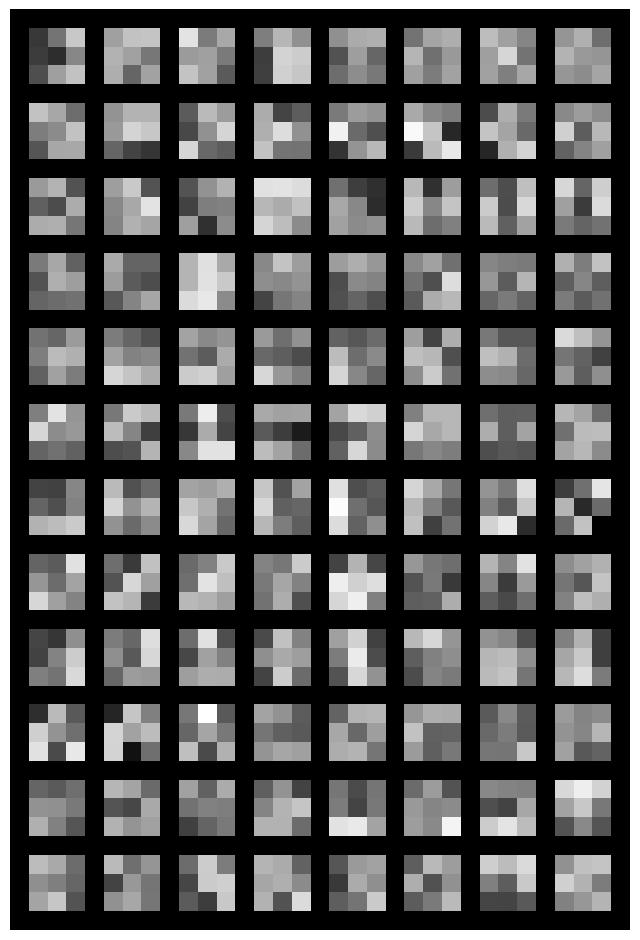

torch.Size([10, 8, 3, 3])


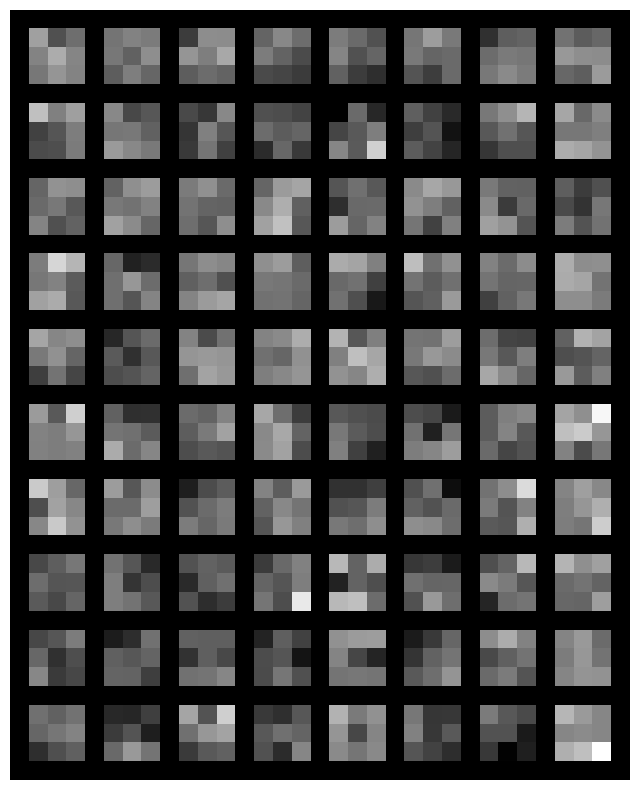

In [137]:
import matplotlib.pyplot as plt
from torchvision import utils
import numpy as np

def visualize_tensor(tensor, no_filters=8, nrow=8): 
    tensor = tensor[:,:no_filters,:,:]
    n,c,w,h = tensor.shape
    print(tensor.shape)
    tensor = tensor.reshape(n*c, -1, w, h)

    rows = np.min((tensor.shape[0] // nrow + 1, 64))    
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=1)
    plt.figure(figsize=(nrow,rows) )
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    

layers = list(model.parameters())
fil = layers[0].data.to('cpu')
visualize_tensor(fil)
plt.axis('off')
plt.ioff()
plt.show()

fil = layers[-2].data.to('cpu')
visualize_tensor(fil)
plt.axis('off')
plt.ioff()
plt.show()

In [128]:
list(model.parameters())[-2].data.shape

torch.Size([10, 64, 3, 3])